In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("doc_2021-07-31_14-15-20..augmentations_results08_38_06", "rb") as bfile:
    data = pickle.load(bfile)

In [3]:
def dict_to_list(d):
    return [v for k,v in d.items()]

In [4]:
for aug in data:
    for ind,shit in enumerate(["loss_train", "loss_test", "accuracy_test"]):
        data[aug][ind][shit] = dict_to_list(data[aug][ind][shit])

In [5]:
results = {}

for aug in data:
    tmp = {}
    for ind,shit in enumerate(["loss_train", "loss_test", "accuracy_test"]):
#         tmp.update({shit: data[aug][ind][shit]})
#         print(tmp)
        tmp[shit] = data[aug][ind][shit]
        
#         tmp[shit] = [ind] # tuple(data[aug][ind][shit])
    
#     del data[aug]
    results[aug] = tmp

In [6]:
# palette = plt.get_cmap("magma", 8)
palette = ["#C74D26", "#C78026", "#26A3C7", "#264FC7", "#6126C7", "#AA26C7", "#26C785", "#C7264B"]
palette

['#C74D26',
 '#C78026',
 '#26A3C7',
 '#264FC7',
 '#6126C7',
 '#AA26C7',
 '#26C785',
 '#C7264B']

In [7]:
cl = lambda x: x[:50]

def cut_legend(lg):
    return "\n".join(list(map(cl, lg.split("\n"))))

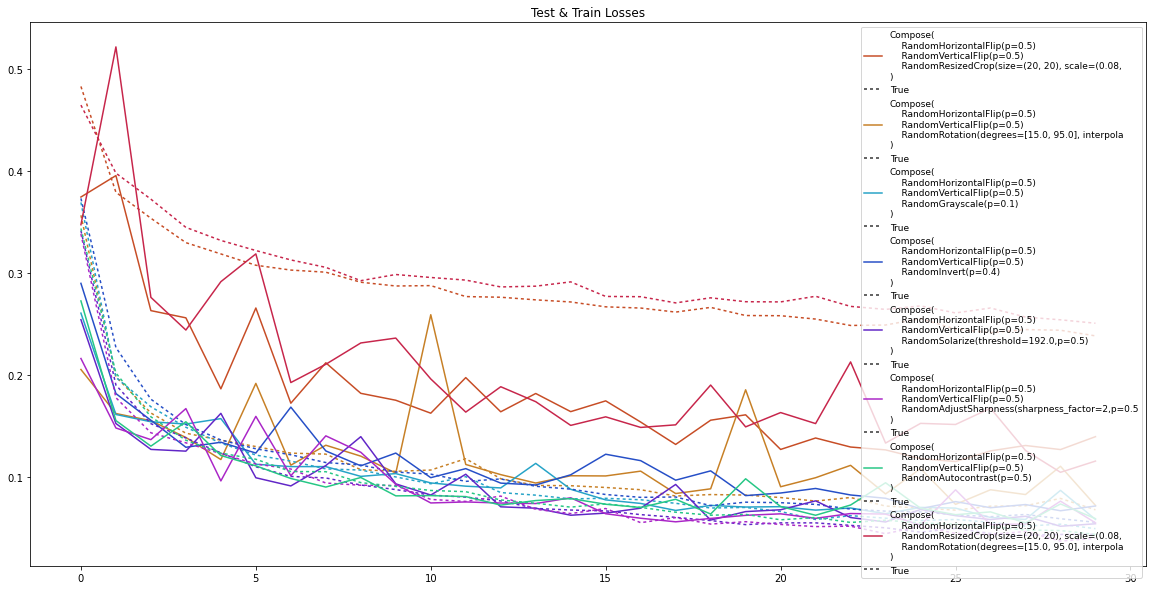

In [8]:
plt.figure(figsize=(20, 10))
plt.title("Test & Train Losses")

for ind, (k,v) in enumerate(results.items()):
    sns.lineplot(x=range(30), y=v["loss_test"], label=cut_legend(repr(k)), color=palette[ind])
    sns.lineplot(x=range(30), y=v["loss_train"], style=True, dashes=[(2,2)], color=palette[ind])
    
plt.legend(prop={'size': 9})

In [9]:
def acc_tnsr_to_val(tnsr):
    return [i.cpu().item() for i in tnsr]

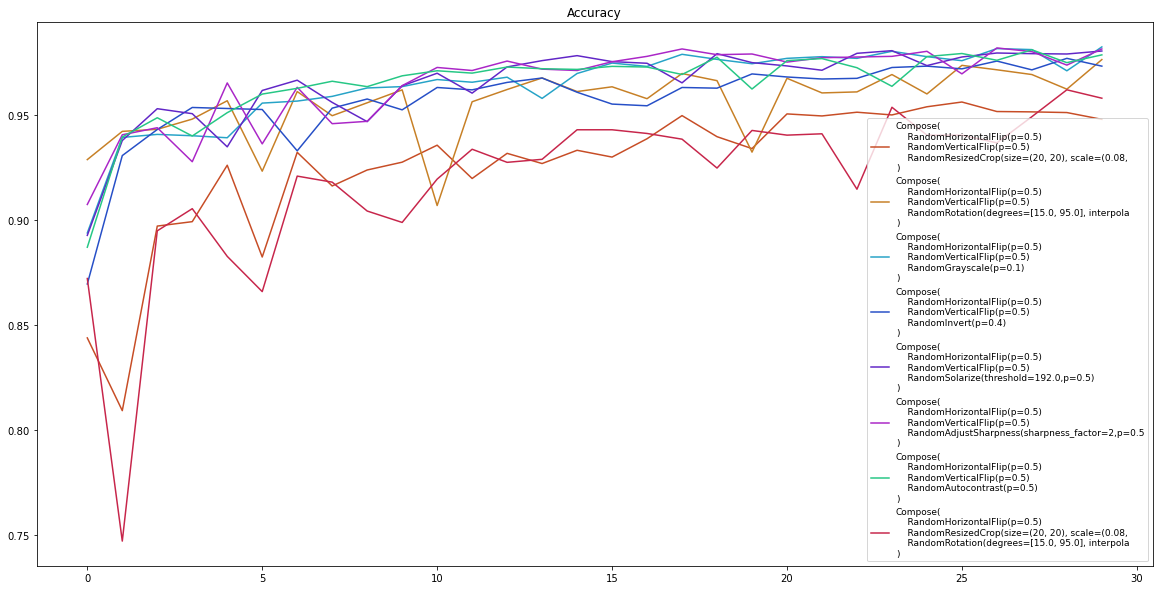

In [10]:
plt.figure(figsize=(20, 10))
plt.title("Accuracy")

for ind, (k,v) in enumerate(results.items()):
    sns.lineplot(x=range(30), y=acc_tnsr_to_val(v["accuracy_test"]), label=cut_legend(repr(k)), color=palette[ind])    
plt.legend(prop={'size': 9})